<a href="https://colab.research.google.com/github/Divya1229/ML/blob/main/Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm,skew
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Loading data

In [9]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

Understanding Data

In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.shape

(25, 2)

In [12]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [17]:
def inspect_data(data):
    return pd.DataFrame({"DataType":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(data)

,DataType,No of Levels,Levels
Hours,float64,23,[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5...
Scores,int64,23,[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 ...


In [18]:
data.dtypes


Hours     float64
Scores      int64
dtype: object

Statistical Summary

In [20]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for Duplicates

In [21]:
data.duplicated().sum()

0

In [22]:
data[data.duplicated()]

,Hours,Scores


Missing Values

In [23]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Skewness and kurtosis

In [24]:
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [25]:
data.kurt()

Hours    -1.302343
Scores   -1.443833
dtype: float64

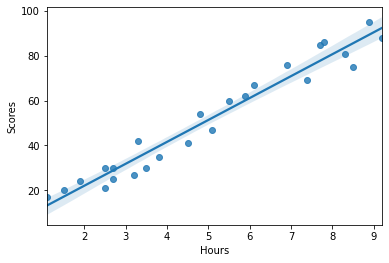

In [26]:
sns.regplot(x="Hours",y="Scores",data=data);

There is a Positive Linear relation between variables

In [27]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


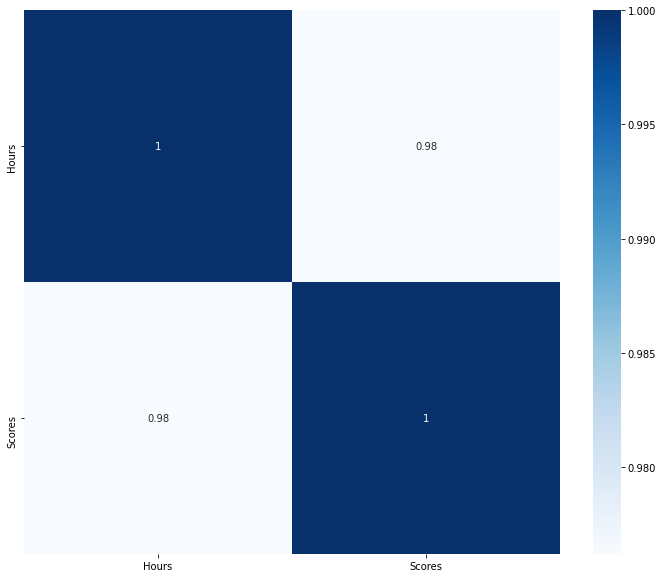

In [28]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), cmap = 'Blues' , annot = True)

Preparing Data

In [29]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [30]:
x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [31]:
trainx,valx,trainy,valy = train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
print(trainx.shape)
print(valx.shape)
print(trainy.shape)
print(valy.shape)

(20, 1)
(5, 1)
(20,)
(5,)


Model Building


Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
trainpred_lr = lm.predict(trainx)
testpred_lr = lm.predict(valx)

Comparing actual and Predicted values

In [39]:
df = pd.DataFrame({'Actual':valy, 'Predicted': testpred_lr})
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


Evaluation Metrics

In [40]:
print('            MODEL-METRICS          ')
print('MAE-Val:\t',mean_absolute_error(valy, testpred_lr)** .5)
print('RMSE-Val:\t',mean_squared_error(valy, testpred_lr)** .5)
print('R2-Val:\t',r2_score(valy, testpred_lr))
lm_acc= round(lm.score(trainx,trainy) * 100, 2)
lm_acc

            MODEL-METRICS          
MAE-Val:	 2.8075608784620205
RMSE-Val:	 8.299453038771674
R2-Val:	 0.8421031525243527


96.38

In [42]:
from sklearn.model_selection import learning_curve

In [43]:
def plot_curve():
    # instantiate
    lm = LinearRegression()
    lm.fit(trainx,trainy)
    train_sizes, train_scores, test_scores = learning_curve(lm, trainx,trainy, n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("LinearRegression")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


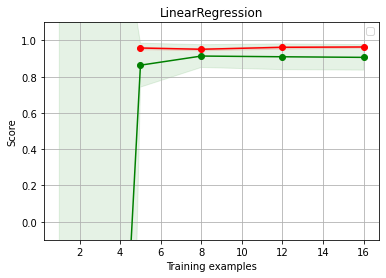

In [45]:
%matplotlib inline
plot_curve()
